<a href="https://colab.research.google.com/github/Subiksha3002/Solar-flare-class-prediction/blob/main/Flare_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from google.colab import files
existing_df = pd.read_csv('/content/output (1).csv')
new_df = pd.read_csv('/content/output (3).csv')
combined_df = pd.concat([existing_df, new_df], axis=0, ignore_index=True)
combined_df.to_csv('full_dataset.csv', index=False)
files.download('full_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files

file_path = '/content/full1_dataset.csv'
data = pd.read_csv(file_path)
print("Unique values in 'Flare' column before encoding:", data['flare'].unique())
label_encoder = LabelEncoder()
data['flare'] = label_encoder.fit_transform(data['flare'])
print("Unique values in 'Flare' column after encoding:", data['flare'].unique())
data.to_csv('modified_full_dataset.csv', index=False)
files.download("modified_full_dataset.csv")


Unique values in 'Flare' column before encoding: ['N' 'C1.1' 'M1.2' 'M1.5' 'M1.0' 'M2.1' 'M4.2' 'M3.8' 'M2.3' 'X2.2' 'X9.3'
 'M2.5' 'X1.3' 'M3.9' 'M1.3' 'M8.1' 'C1.0' 'C3.0' 'B6.6' 'M1.4' 'C5.4'
 'C5.9' 'C6.2' 'C3.3' 'C7.9' 'C2.8' 'C2.7' 'C3.9' 'C2.2' 'C6.4' 'C4.3'
 'C1.9' 'C2.3' 'C1.4' 'C2.9']
Unique values in 'Flare' column after encoding: [31  2 20 23 19 24 29 27 25 33 34 26 32 28 21 30  1 10  0 22 14 15 16 11
 18  8  7 12  5 17 13  4  6  3  9]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import files
file_path = '/content/modified_full_dataset.csv'
data = pd.read_csv(file_path)
print("Unique values in 'Predicted Flare' column before encoding:", data['Predicted Label'].unique())
label_encoder = LabelEncoder()
data['Predicted Label'] = label_encoder.fit_transform(data['Predicted Label'])
print("Unique values in 'Predicted Flare' column after encoding:", data['Predicted Label'].unique())
data.to_csv('numeric_predicted_flare_dataset.csv', index=False)
files.download("numeric_predicted_flare_dataset.csv")


Unique values in 'Predicted Flare' column before encoding: ['Negative' 'Positive']
Unique values in 'Predicted Flare' column after encoding: [0 1]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

        PC1       PC2
0 -2.447846  3.608099
1 -2.381570  3.663259
2 -2.410354  3.573657
3 -2.433962  3.590865
4 -2.458718  3.597080


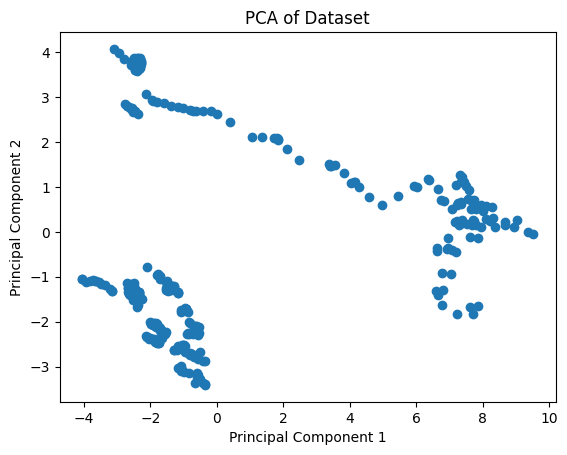

Variance explained by PC1: 0.5564872676236003
Variance explained by PC2: 0.21097135888360935


In [17]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
file_path = '/content/timeupdated1_dataset.csv'
data = pd.read_csv(file_path)
X = data[['Predicted Label', 'flare','NOAA','HARP','TOTUSJH','SAVNCPP','ABSNJZH','TOTPOT'
,'TOTUSJZ','TOTBSQ','USFLUX','Cdec','Chis1d','Chis','Edec','Mhis','Xmax1d','Mdec','AREA_ACR','MEANPOT','Mhis1d'
,'SHRGT45','TOTFX','MEANSHR','timestamp_numeric']]  # Replace with actual feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(df_pca.head())

import matplotlib.pyplot as plt

plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()
explained_variance = pca.explained_variance_ratio_
print(f'Variance explained by PC1: {explained_variance[0]}')
print(f'Variance explained by PC2: {explained_variance[1]}')



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


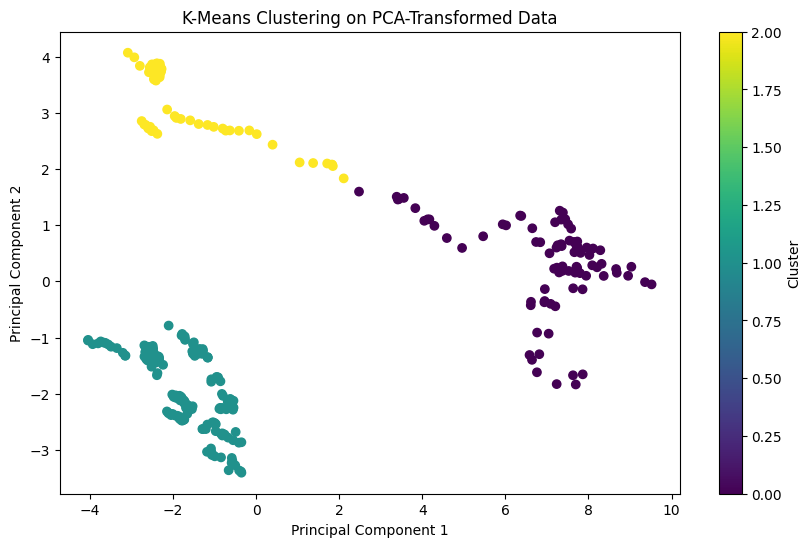

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_pca)

df_pca['Cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster')
plt.show()



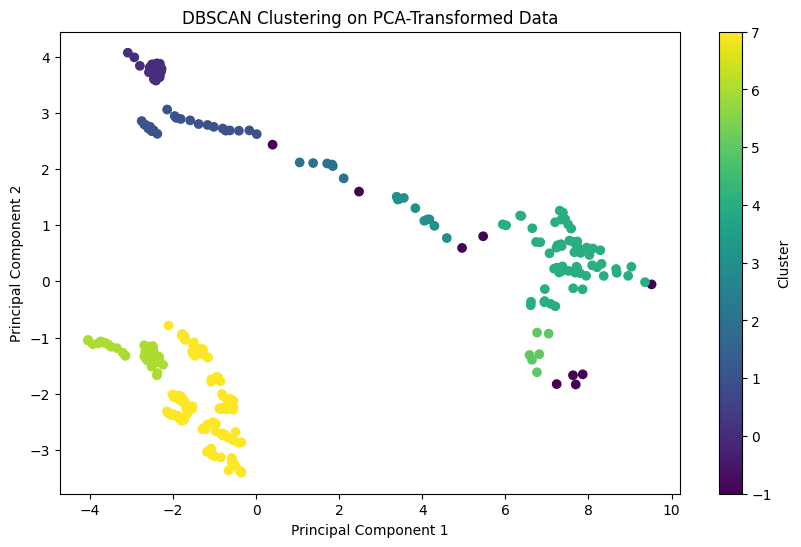

In [19]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_pca)
df_pca['Cluster'] = dbscan.labels_
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.colorbar(label='Cluster')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


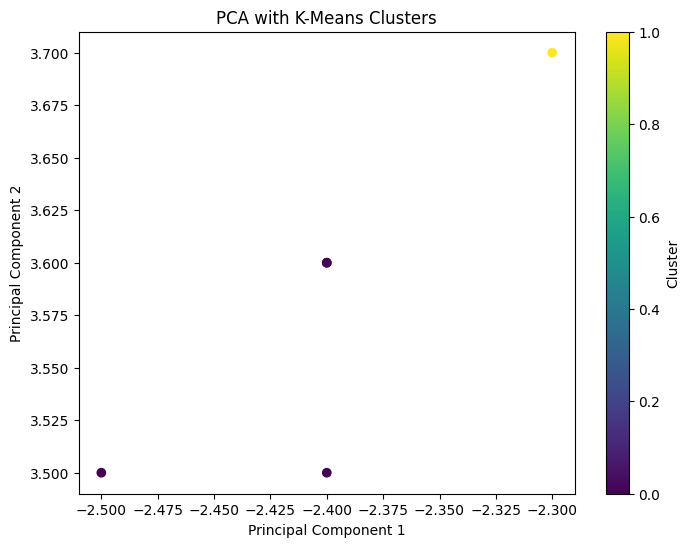

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'PC1': [-2.4, -2.3, -2.4, -2.4, -2.5],
    'PC2': [3.6, 3.7, 3.5, 3.6, 3.5]
})
kmeans = KMeans(n_clusters=2)
Cluster = kmeans.fit_predict(data[['PC1', 'PC2']])
data['Cluster'] = Cluster
plt.figure(figsize=(8, 6))
plt.scatter(data['PC1'], data['PC2'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with K-Means Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [21]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = '/content/timeupdated1_dataset.csv'
data = pd.read_csv(file_path)
features = ['Predicted Label', 'flare', 'NOAA', 'HARP', 'TOTUSJH', 'SAVNCPP', 'ABSNJZH', 'TOTPOT',
            'TOTUSJZ', 'TOTBSQ', 'USFLUX', 'Cdec', 'Chis1d', 'Chis', 'Edec', 'Mhis', 'Xmax1d',
            'Mdec', 'AREA_ACR', 'MEANPOT', 'Mhis1d', 'SHRGT45', 'TOTFX', 'MEANSHR', 'timestamp_numeric']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
loadings = pca.components_
loading_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=features)

print(loading_df)


                        PC1       PC2
Predicted Label    0.180423 -0.142279
flare              0.134993  0.283213
NOAA               0.135978  0.364938
HARP               0.135978  0.364938
TOTUSJH            0.260095 -0.063668
SAVNCPP            0.220378 -0.189358
ABSNJZH            0.256404  0.005860
TOTPOT             0.247670 -0.124623
TOTUSJZ            0.258927  0.023233
TOTBSQ             0.263292  0.019971
USFLUX             0.184328 -0.258766
Cdec               0.192288 -0.157555
Chis1d             0.190796 -0.153698
Chis               0.163966 -0.248717
Edec               0.190465 -0.003509
Mhis               0.244728 -0.023488
Xmax1d             0.161538  0.001311
Mdec               0.218653  0.024102
AREA_ACR           0.182830  0.305289
MEANPOT            0.226388 -0.085443
Mhis1d             0.209391  0.023475
SHRGT45            0.061363  0.389665
TOTFX             -0.142145  0.101307
MEANSHR           -0.238777 -0.053980
timestamp_numeric  0.136965  0.363719


In [22]:
import numpy as np
import pandas as pd

loadings = pd.DataFrame({
    'Feature': ['Predicted Label', 'flare', 'NOAA', 'HARP', 'TOTUSJH', 'SAVNCPP', 'ABSNJZH', 'TOTPOT', 'TOTUSJZ',
                'TOTBSQ', 'USFLUX', 'Cdec', 'Chis1d', 'Chis', 'Edec', 'Mhis', 'Xmax1d', 'Mdec', 'AREA_ACR',
                'MEANPOT', 'Mhis1d', 'SHRGT45', 'TOTFX', 'MEANSHR', 'timestamp_numeric'],
    'PC1_Loading': [0.180423, 0.134993, 0.135978, 0.135978, 0.260095, 0.220378, 0.256404, 0.247670, 0.258927,
                    0.263292, 0.184328, 0.192288, 0.190796, 0.163966, 0.190465, 0.244728, 0.161538, 0.218653, 0.182830,
                    0.226388, 0.209391, 0.061363, -0.142145, -0.238777, 0.136965],
    'PC2_Loading': [-0.142279, 0.283213, 0.364938, 0.364938, -0.063668, -0.189358, 0.005860, -0.124623, 0.023233,
                    0.019971, -0.258766, -0.157555, -0.153698, -0.248717, -0.003509, -0.023488, 0.001311, 0.024102, 0.305289,
                    -0.085443, 0.023475, 0.389665, 0.101307, -0.053980, 0.363719]
})
threshold = 0.25
important_features = loadings.loc[(np.abs(loadings['PC1_Loading']) > threshold) |
                                  (np.abs(loadings['PC2_Loading']) > threshold), 'Feature']

print("Selected Important Features:")
print(important_features.tolist())



Selected Important Features:
['flare', 'NOAA', 'HARP', 'TOTUSJH', 'ABSNJZH', 'TOTUSJZ', 'TOTBSQ', 'USFLUX', 'AREA_ACR', 'SHRGT45', 'timestamp_numeric']


In [23]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


features = ['NOAA', 'HARP', 'TOTUSJH', 'ABSNJZH', 'TOTUSJZ', 'TOTBSQ', 'USFLUX', 'AREA_ACR', 'SHRGT45', 'timestamp_numeric']
X = data[features]
y = data['flare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
import joblib
joblib.dump(rf_classifier, 'random_forest_solar_flare_model.pkl')


Confusion Matrix:
 [[ 0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

['random_forest_solar_flare_model.pkl']

In [24]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred = rf_classifier.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)


Confusion Matrix:
 [[ 0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 

In [25]:

new_input = [[101, 102, 0.0023, 0.0156, 0.0275, 0.0035, 1500.7, 234.9, 88.2, 1692310400]]
predicted_class = rf_classifier.predict(new_input)
print("Predicted Flare Class:", predicted_class[0])


Predicted Flare Class: 30


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [26]:
import pandas as pd
new_input = [[-0.12673, 7115, -0.128906857, -0.083767913, -0.057803887, -0.360866317, 1.101154005, 2.006334258, 88.2, 1504418323]]

feature_names = X_train.columns
new_input_df = pd.DataFrame(new_input, columns=feature_names)
predicted_class = rf_classifier.predict(new_input_df)
label_to_flare_class ={
    31: 'N',
    2: 'C1.1',
    20: 'M1.2',
    23: 'M1.5',
    19: 'M1.0',
    24: 'M2.1',
    29: 'M4.2',
    27: 'M3.8',
    25: 'M2.3',
    33: 'X2.2',
    34: 'X9.3',
    26: 'M2.5',
    32: 'X1.3',
    28: 'M3.9',
    21: 'M1.3',
    30: 'M8.1',
    1: 'C1.0',
    10: 'C3.0',
    0: 'B6.6',
    22: 'M1.4',
    14: 'C5.4',
    15: 'C5.9',
    16: 'C6.2',
    11: 'C3.3',
    18: 'C7.9',
    8: 'C2.8',
    7: 'C2.7',
    12: 'C3.9',
    5: 'C2.2',
    17: 'C6.4',
    13: 'C4.3',
    4: 'C1.9',
    6: 'C2.3',
    3: 'C1.4',
    9: 'C2.9'
}
Flare_class = label_to_flare_class.get(predicted_class[0], "Unknown Class")
print("Predicted Flare Class:", Flare_class)


Predicted Flare Class: M1.2
